<a href="https://colab.research.google.com/github/sofilailatul/DataMining/blob/main/latihan_no1_modul12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

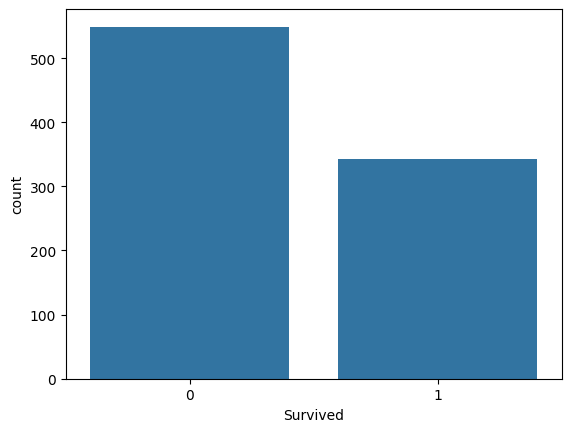

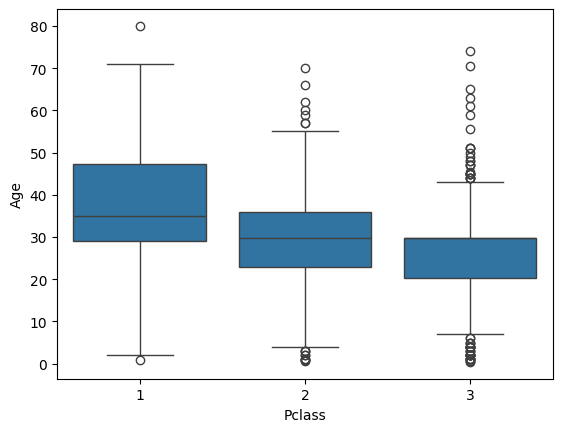

Confusion Matrix - Training
[[343  49]
 [ 65 166]]
Classification Report - Training
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       392
           1       0.77      0.72      0.74       231

    accuracy                           0.82       623
   macro avg       0.81      0.80      0.80       623
weighted avg       0.82      0.82      0.82       623

Confusion Matrix - Testing
[[131  26]
 [ 30  81]]
Classification Report - Testing
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       157
           1       0.76      0.73      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Langkah 1: Memuat dan Memahami Data
df = pd.read_csv('titanic.csv')
print(df.shape)
print(df.head())
print(df.info())

# Langkah 2: Membersihkan dan Mempersiapkan Data
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(['Cabin'], axis=1, inplace=True)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'])

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

# Langkah 3: Melakukan Eksplorasi dan Analisis Data
sns.countplot(x='Survived', data=df)
plt.show()

sns.boxplot(x='Pclass', y='Age', data=df)
plt.show()

# Langkah 4: Melatih Model Menggunakan MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 6), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train, y_train)

y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

# Langkah 5: Mengevaluasi Performa Model
print("Confusion Matrix - Training")
print(confusion_matrix(y_train, y_pred_train))
print("Classification Report - Training")
print(classification_report(y_train, y_pred_train))

print("Confusion Matrix - Testing")
print(confusion_matrix(y_test, y_pred_test))
print("Classification Report - Testing")
print(classification_report(y_test, y_pred_test))
